### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [37]:
df = pd.read_csv('data/coupons.csv')

In [78]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

2. Investigate the dataset for missing or problematic data.

In [39]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [40]:
df["car"].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [41]:
len( df )

12684

In [42]:
df["CarryAway"].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [43]:
df[["Bar","CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50", "Y" ]][df["RestaurantLessThan20"].isna()]

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y
517,NaN,NaN,NaN,NaN,NaN,0
518,NaN,NaN,NaN,NaN,NaN,0
519,NaN,NaN,NaN,NaN,NaN,1
520,NaN,NaN,NaN,NaN,NaN,0
521,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...
8973,never,1~3,4~8,NaN,4~8,0
8974,never,1~3,4~8,NaN,4~8,1
8975,never,1~3,4~8,NaN,4~8,1
8976,never,1~3,4~8,NaN,4~8,1


3. Decide what to do about your missing data -- drop, replace, other...

It seems like the Car feature column has too little data to be useful since the majority is missing. So we will be removing this column.

In [44]:
df = df.drop( "car", axis = 1)

As for the NaN for the locations people go to, for now, I'll change it to never. The size of the missing values is small enough comparitively to not have a major impact.

In [48]:
for col in ["Bar","CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]:
    df[col] = df[col].fillna( "never" )
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [82]:
print( "Number of acceptances:",df.value_counts( "Y" )[1] )
print( "Total number of observations:", len( df ) )
print( "Proportion of acceptances:", df.value_counts( "Y" )[1] / len( df ) )

Number of acceptances: 7210
Total number of observations: 12684
Proportion of acceptances: 0.5684326710816777
Y
1    7210
0    5474
Name: count, dtype: int64


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

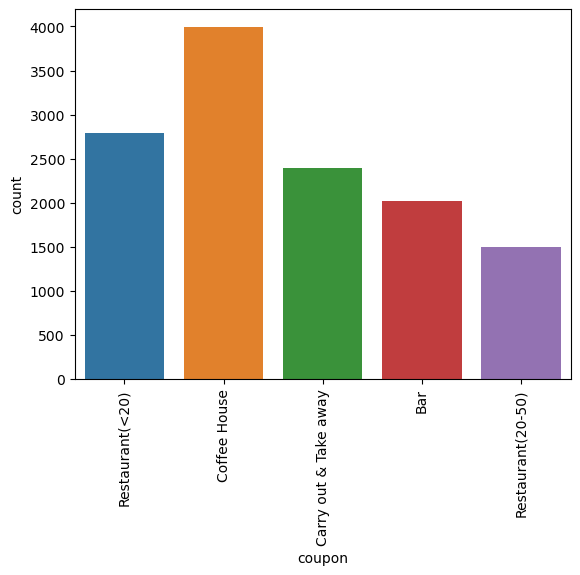

In [66]:
sns.countplot( data = df, x = "coupon" )
plt.xticks( rotation = 90 )

6. Use a histogram to visualize the temperature column.

[55 80 30]


C:\Users\Derek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


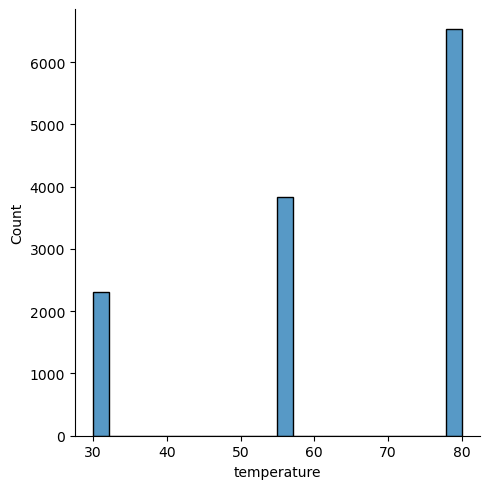

In [70]:
sns.displot( data = df, x = df["temperature"] )
print( df["temperature"].unique() )

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [72]:
barCoupons = df[df["coupon"] == "Bar"]
len( barCoupons )

2017

2. What proportion of bar coupons were accepted?


In [83]:
barCoupons.value_counts( "Y" )[1] / len( barCoupons )

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [85]:
barCoupons["Bar"].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [94]:
greaterThan3 = barCoupons[barCoupons["Bar"].isin(["4~8", "gt8"])]
print( "More than 3 times a month:",greaterThan3.value_counts( "Y" )[1] / len( greaterThan3 ) )
print( len( greaterThan3 ) )

lessThan3 = barCoupons[~barCoupons["Bar"].isin(["4~8", "gt8"])]
print( "Less than 3 times a month:", lessThan3.value_counts( "Y" )[1] / len( lessThan3 ) )
print( len( lessThan3 ) )

More than 3 times a month: 0.7688442211055276
199
Less than 3 times a month: 0.37073707370737075
1818


There looks to be a significant increase in accepted coupons if the driver frequents bars often. However the amount of data is very small, so it might be inaccurate

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [96]:
barCoupons["age"].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [104]:
greaterThan1 = ["1~3","gt8","4~8"]
ages = ["46","26","31","41","50plus"]
drivers = barCoupons.query( "Bar in @greaterThan1 and age in @ages" )
print( len( drivers ) )

print( ">25 Driver bar visitors:", drivers.value_counts( "Y" )[1] / len( drivers ) )
print( "Total Drivers:",barCoupons.value_counts( "Y" )[1] / len( barCoupons ) )


380
>25 Driver bar visitors: 0.7157894736842105
Total Drivers: 0.41001487357461575


Similarly, older drivers that frequent bars often accept the coupons a lot more.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [110]:
print( df["passanger"].unique() )
print( df["occupation"].unique()  )

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [116]:
notKids = ["Friend(s)","Partner"]

drivers2 = barCoupons.query( "Bar in @greaterThan1 and passanger in @notKids and occupation != 'Farming Fishing & Forestry'")
print( "Num drivers:", len( drivers2 ) )
print( "Proportion of accepting:",drivers2.value_counts("Y")[1] / len(drivers2) )

Num drivers: 195
Proportion of accepting: 0.717948717948718


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [120]:
print( barCoupons["maritalStatus"].unique()  )
print( barCoupons["RestaurantLessThan20"].unique() )
print( barCoupons["income"].unique() )

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [124]:
def getAcceptanceRate( data ):
    print( len( data ) )
    print( data.value_counts( "Y" )[1] / len( data ) )
    print()

df1 = barCoupons.query( "Bar in @greaterThan1 and passanger in @notKids and maritalStatus != 'Widowed'")
getAcceptanceRate( df1 )

youngAges = ["21", "below21", "26"]
df2 = barCoupons.query( "Bar in @greaterThan1 and age in @youngAges" )
getAcceptanceRate( df2 )

greaterThan4 = ["4~8","gt8"]
lessThan50k = ["$37500 - $49999",'$12500 - $24999','$25000 - $37499','Less than $12500']
df3 = barCoupons.query( "RestaurantLessThan20 in @greaterThan4 and income in @lessThan50k" )
getAcceptanceRate( df3 )

195
0.717948717948718

345
0.7217391304347827

344
0.45348837209302323



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From these observations, we can see that drivers that frequent bars more often a month have a higher acceptance of the coupons. In addition, it seems like drivers that don't have a high income and frequent cheap restaurarnts don't accept the coupon as much. Lastly, it does seem like drivers with non-kid passengers accepted it more often as well.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  